In [1]:
# import numpy and pandas
import numpy as np
import pandas
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import math



In [2]:
data1 = pd.read_csv('Foreign_Population_by_age_Gender.csv', sep=';', usecols=('Countries','Male','Female','Total inmigrants population by_country','% in relation to the inmigrants population'))
data1.head(200)

,Countries,Male,Female,Total inmigrants population by_country,% in relation to the inmigrants population
0,Marruecos,130896,104382,235278,"18,50"
1,Rumanía,42159,44369,86528,"6,80"
2,Italia,41610,35216,76826,"6,04"
3,China,31149,32079,63228,"4,97"
4,Pakistán,38355,17416,55771,"4,39"
...,...,...,...,...,...
173,Kiribati,..,..,4,"<0,01"
174,Resto de países,14,8,22,"<0,01"
175,No consta país,133,198,331,"0,03"
176,Apatridas,134,62,196,"0,02"


In [3]:
data1.isna().sum()

Countries                                     0
Male                                          0
Female                                        0
Total inmigrants population by_country        0
% in relation to the inmigrants population    0
dtype: int64

In [4]:
data1.dtypes

Countries                                     object
Male                                          object
Female                                        object
Total inmigrants population by_country         int64
% in relation to the inmigrants population    object
dtype: object

 Formatting & Cleaning data

In [5]:
data1 = data1.rename(columns = {'Male':'Total Male', 'Female':'Total Female'})
data1

,Countries,Total Male,Total Female,Total inmigrants population by_country,% in relation to the inmigrants population
0,Marruecos,130896,104382,235278,"18,50"
1,Rumanía,42159,44369,86528,"6,80"
2,Italia,41610,35216,76826,"6,04"
3,China,31149,32079,63228,"4,97"
4,Pakistán,38355,17416,55771,"4,39"
...,...,...,...,...,...
173,Kiribati,..,..,4,"<0,01"
174,Resto de países,14,8,22,"<0,01"
175,No consta país,133,198,331,"0,03"
176,Apatridas,134,62,196,"0,02"


In [6]:
data1 = data1.rename(columns = {'% in relation to the inmigrants population':'Percents in relation to the inmigrants population'})
data1

,Countries,Total Male,Total Female,Total inmigrants population by_country,Percents in relation to the inmigrants population
0,Marruecos,130896,104382,235278,"18,50"
1,Rumanía,42159,44369,86528,"6,80"
2,Italia,41610,35216,76826,"6,04"
3,China,31149,32079,63228,"4,97"
4,Pakistán,38355,17416,55771,"4,39"
...,...,...,...,...,...
173,Kiribati,..,..,4,"<0,01"
174,Resto de países,14,8,22,"<0,01"
175,No consta país,133,198,331,"0,03"
176,Apatridas,134,62,196,"0,02"


In [7]:
cols = []
for i in range(len(data1.columns)):
    cols.append(data1.columns[i].lower().replace(' ', '_'))
data1.columns = cols

data1

,countries,total_male,total_female,total_inmigrants_population_by_country,percents_in_relation_to_the_inmigrants_population
0,Marruecos,130896,104382,235278,"18,50"
1,Rumanía,42159,44369,86528,"6,80"
2,Italia,41610,35216,76826,"6,04"
3,China,31149,32079,63228,"4,97"
4,Pakistán,38355,17416,55771,"4,39"
...,...,...,...,...,...
173,Kiribati,..,..,4,"<0,01"
174,Resto de países,14,8,22,"<0,01"
175,No consta país,133,198,331,"0,03"
176,Apatridas,134,62,196,"0,02"


In [8]:
data1['total_male'] = data1['total_male'].replace("..")
data1['total_male'] = pd.to_numeric(data1['total_male'], downcast='integer')


In [9]:
data1['total_female'] = data1['total_female'].replace("..")
data1['total_female'] = pd.to_numeric(data1['total_female'], downcast='integer')

In [10]:
data1

,countries,total_male,total_female,total_inmigrants_population_by_country,percents_in_relation_to_the_inmigrants_population
0,Marruecos,130896,104382,235278,"18,50"
1,Rumanía,42159,44369,86528,"6,80"
2,Italia,41610,35216,76826,"6,04"
3,China,31149,32079,63228,"4,97"
4,Pakistán,38355,17416,55771,"4,39"
...,...,...,...,...,...
173,Kiribati,5,4,4,"<0,01"
174,Resto de países,14,8,22,"<0,01"
175,No consta país,133,198,331,"0,03"
176,Apatridas,134,62,196,"0,02"


In [11]:
data1['percents_in_relation_to_the_inmigrants_population']= data1['percents_in_relation_to_the_inmigrants_population'].str.replace('<','')

In [12]:
data1['percents_in_relation_to_the_inmigrants_population'] = data1['percents_in_relation_to_the_inmigrants_population'].str.replace(',', '').astype(int) / 100
data1['percents_in_relation_to_the_inmigrants_population'] = data1['percents_in_relation_to_the_inmigrants_population'].astype('float64')


In [13]:
data1

,countries,total_male,total_female,total_inmigrants_population_by_country,percents_in_relation_to_the_inmigrants_population
0,Marruecos,130896,104382,235278,18.50
1,Rumanía,42159,44369,86528,6.80
2,Italia,41610,35216,76826,6.04
3,China,31149,32079,63228,4.97
4,Pakistán,38355,17416,55771,4.39
...,...,...,...,...,...
173,Kiribati,5,4,4,0.01
174,Resto de países,14,8,22,0.01
175,No consta país,133,198,331,0.03
176,Apatridas,134,62,196,0.02


In [14]:
data1.dtypes

countries                                             object
total_male                                             int32
total_female                                           int32
total_inmigrants_population_by_country                 int64
percents_in_relation_to_the_inmigrants_population    float64
dtype: object

In [15]:
data1.isna().sum()

countries                                            0
total_male                                           0
total_female                                         0
total_inmigrants_population_by_country               0
percents_in_relation_to_the_inmigrants_population    0
dtype: int64

 Formatting & Cleaning Data2

In [16]:
data2 = pd.read_csv('By Gender.csv.', sep=';', usecols=('Population age','Male','Female','Total','% Population'))
data2

,Population age,Male,Female,Total,% Population
0,De 0 a 4 años,33587,32261,65848,"5,18"
1,De 5 a 9 años,32761,31094,63855,"5,02"
2,De 10 a 14 años,28939,26729,55668,"4,38"
3,De 15 a 20 años,31214,24785,55999,"4,40"
4,De 20 a 24 años,46960,40603,87563,"6,88"
5,De 25 a 29 años,68087,66617,134704,"10,59"
6,De 30 a 34 años,78804,80303,159107,"12,51"
7,De 35 a 39 años,78989,77909,156898,"12,34"
8,De 40 a 44 años,77358,67724,145082,"11,41"
9,De 44 a 49 años,61764,51092,112856,"8,87"


In [17]:
data2.shape

(20, 5)

In [18]:
data2.isna().sum()

Population age    0
Male              0
Female            0
Total             0
% Population      1
dtype: int64

In [19]:
data2 = data2[data2['% Population'].isna()==False]
data2

,Population age,Male,Female,Total,% Population
0,De 0 a 4 años,33587,32261,65848,"5,18"
1,De 5 a 9 años,32761,31094,63855,"5,02"
2,De 10 a 14 años,28939,26729,55668,"4,38"
3,De 15 a 20 años,31214,24785,55999,"4,40"
4,De 20 a 24 años,46960,40603,87563,"6,88"
5,De 25 a 29 años,68087,66617,134704,"10,59"
6,De 30 a 34 años,78804,80303,159107,"12,51"
7,De 35 a 39 años,78989,77909,156898,"12,34"
8,De 40 a 44 años,77358,67724,145082,"11,41"
9,De 44 a 49 años,61764,51092,112856,"8,87"


In [20]:
data2.isna().sum()

Population age    0
Male              0
Female            0
Total             0
% Population      0
dtype: int64

In [21]:
data2.dtypes

Population age    object
Male              object
Female            object
Total             object
% Population      object
dtype: object

In [22]:
def clean_df(data2):
    n_cols = []
    for i in range(len(data2.columns)):
        n_cols.append(data2.columns[i].lower().replace(' ', '_'))
    data2.columns = n_cols
    data2['male'] = data2['male'].replace("..")
    data2['male'] = pd.to_numeric(data2['male'], downcast='integer')
    data2['female'] = data2['female'].replace("..")
    data2['female'] = pd.to_numeric(data2['female'], downcast='integer')
    data2['total'] = data2['total'].replace("..")
    data2['total'] = pd.to_numeric(data2['total'], downcast='integer')
    
    return data2

In [23]:
data2 = clean_df(data2)
data2

C:\Users\sanch\AppData\Local\Temp\ipykernel_46112\3189571452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['male'] = data2['male'].replace("..")
C:\Users\sanch\AppData\Local\Temp\ipykernel_46112\3189571452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['male'] = pd.to_numeric(data2['male'], downcast='integer')
C:\Users\sanch\AppData\Local\Temp\ipykernel_46112\3189571452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,population_age,male,female,total,%_population
0,De 0 a 4 años,33587,32261,65848,"5,18"
1,De 5 a 9 años,32761,31094,63855,"5,02"
2,De 10 a 14 años,28939,26729,55668,"4,38"
3,De 15 a 20 años,31214,24785,55999,"4,40"
4,De 20 a 24 años,46960,40603,87563,"6,88"
5,De 25 a 29 años,68087,66617,134704,"10,59"
6,De 30 a 34 años,78804,80303,159107,"12,51"
7,De 35 a 39 años,78989,77909,156898,"12,34"
8,De 40 a 44 años,77358,67724,145082,"11,41"
9,De 44 a 49 años,61764,51092,112856,"8,87"


In [24]:
last_row = len(data2) - 1
data2 = data2.drop(data2.index[last_row])


In [25]:
data2

,population_age,male,female,total,%_population
0,De 0 a 4 años,33587,32261,65848,"5,18"
1,De 5 a 9 años,32761,31094,63855,"5,02"
2,De 10 a 14 años,28939,26729,55668,"4,38"
3,De 15 a 20 años,31214,24785,55999,"4,40"
4,De 20 a 24 años,46960,40603,87563,"6,88"
5,De 25 a 29 años,68087,66617,134704,"10,59"
6,De 30 a 34 años,78804,80303,159107,"12,51"
7,De 35 a 39 años,78989,77909,156898,"12,34"
8,De 40 a 44 años,77358,67724,145082,"11,41"
9,De 44 a 49 años,61764,51092,112856,"8,87"


In [26]:
data2.dtypes 

population_age    object
male               int32
female             int32
total              int32
%_population      object
dtype: object

Wrangling Data

In [27]:
data1[data1['total_inmigrants_population_by_country']==18810]

,countries,total_male,total_female,total_inmigrants_population_by_country,percents_in_relation_to_the_inmigrants_population
20,República Dominicana,9299,9511,18810,1.48


In [28]:
data2['%_population'] = data2['%_population'].str.replace(',', '.').str.rstrip('%').astype('float')

In [29]:
DR_inm_pop = 18810
DR_percentage_inm_pop = 1.48
total_inmigrants_pop = 1271810

def dr_inmigrants_by_age(data2):
    data2['dr_inmigrants_by_age'] =round(DR_inm_pop*(data2['%_population'] /100))
    data2['dr_percentage_population'] = (data2['dr_inmigrants_by_age'])/total_inmigrants_pop * 100
    return data2



In [30]:
data2 = dr_inmigrants_by_age(data2)
data2

,population_age,male,female,total,%_population,dr_inmigrants_by_age,dr_percentage_population
0,De 0 a 4 años,33587,32261,65848,5.18,974.0,0.076584
1,De 5 a 9 años,32761,31094,63855,5.02,944.0,0.074225
2,De 10 a 14 años,28939,26729,55668,4.38,824.0,0.064790
3,De 15 a 20 años,31214,24785,55999,4.40,828.0,0.065104
4,De 20 a 24 años,46960,40603,87563,6.88,1294.0,0.101745
5,De 25 a 29 años,68087,66617,134704,10.59,1992.0,0.156627
6,De 30 a 34 años,78804,80303,159107,12.51,2353.0,0.185012
7,De 35 a 39 años,78989,77909,156898,12.34,2321.0,0.182496
8,De 40 a 44 años,77358,67724,145082,11.41,2146.0,0.168736
9,De 44 a 49 años,61764,51092,112856,8.87,1668.0,0.131152


In [31]:
data2.dtypes

population_age               object
male                          int32
female                        int32
total                         int32
%_population                float64
dr_inmigrants_by_age        float64
dr_percentage_population    float64
dtype: object

 EDA Process

In [32]:
round(data2.describe())

,male,female,total,%_population,dr_inmigrants_by_age,dr_percentage_population
count,18.0,18.0,18.0,18.0,18.0,18.0
mean,36502.0,34154.0,70656.0,6.0,1045.0,0.0
std,27159.0,25360.0,52399.0,4.0,775.0,0.0
min,1288.0,2235.0,3523.0,0.0,53.0,0.0
25%,13268.0,14428.0,27696.0,2.0,410.0,0.0
50%,31988.0,28975.0,60046.0,5.0,888.0,0.0
75%,58063.0,48470.0,106533.0,8.0,1574.0,0.0
max,78989.0,80303.0,159107.0,13.0,2353.0,0.0


In [33]:
data2.dtypes

population_age               object
male                          int32
female                        int32
total                         int32
%_population                float64
dr_inmigrants_by_age        float64
dr_percentage_population    float64
dtype: object

In [34]:
data2

,population_age,male,female,total,%_population,dr_inmigrants_by_age,dr_percentage_population
0,De 0 a 4 años,33587,32261,65848,5.18,974.0,0.076584
1,De 5 a 9 años,32761,31094,63855,5.02,944.0,0.074225
2,De 10 a 14 años,28939,26729,55668,4.38,824.0,0.064790
3,De 15 a 20 años,31214,24785,55999,4.40,828.0,0.065104
4,De 20 a 24 años,46960,40603,87563,6.88,1294.0,0.101745
5,De 25 a 29 años,68087,66617,134704,10.59,1992.0,0.156627
6,De 30 a 34 años,78804,80303,159107,12.51,2353.0,0.185012
7,De 35 a 39 años,78989,77909,156898,12.34,2321.0,0.182496
8,De 40 a 44 años,77358,67724,145082,11.41,2146.0,0.168736
9,De 44 a 49 años,61764,51092,112856,8.87,1668.0,0.131152


In [88]:
mean_target_dr_inmigrants_by_age =data2[data2['dr_inmigrants_by_age'] >= 410.0]
max_target_dr_inmigrants_by_age = data2[data2['dr_inmigrants_by_age'] <= 2353.0]

target_dr_inmigrants_by_age = data2.loc[(data2['dr_inmigrants_by_age'] <=2353.0) & (data2['dr_inmigrants_by_age']>= 410.0)]
display(target_dr_inmigrants_by_age.shape)
df= target_dr_inmigrants_by_age
df

                 

(13, 7)

,population_age,male,female,total,%_population,dr_inmigrants_by_age,dr_percentage_population
0,De 0 a 4 años,33587,32261,65848,5.18,974.0,0.076584
1,De 5 a 9 años,32761,31094,63855,5.02,944.0,0.074225
2,De 10 a 14 años,28939,26729,55668,4.38,824.0,0.064790
3,De 15 a 20 años,31214,24785,55999,4.40,828.0,0.065104
4,De 20 a 24 años,46960,40603,87563,6.88,1294.0,0.101745
5,De 25 a 29 años,68087,66617,134704,10.59,1992.0,0.156627
6,De 30 a 34 años,78804,80303,159107,12.51,2353.0,0.185012
7,De 35 a 39 años,78989,77909,156898,12.34,2321.0,0.182496
8,De 40 a 44 años,77358,67724,145082,11.41,2146.0,0.168736
9,De 44 a 49 años,61764,51092,112856,8.87,1668.0,0.131152


In [89]:
round(df.describe())

,male,female,total,%_population,dr_inmigrants_by_age,dr_percentage_population
count,13.0,13.0,13.0,13.0,13.0,13.0
mean,48551.0,44814.0,93364.0,7.0,1381.0,0.0
std,21749.0,21481.0,43060.0,3.0,637.0,0.0
min,18444.0,18723.0,37167.0,3.0,549.0,0.0
25%,31214.0,26856.0,56238.0,4.0,831.0,0.0
50%,44868.0,37885.0,82753.0,7.0,1225.0,0.0
75%,68087.0,66617.0,134704.0,11.0,1992.0,0.0
max,78989.0,80303.0,159107.0,13.0,2353.0,0.0


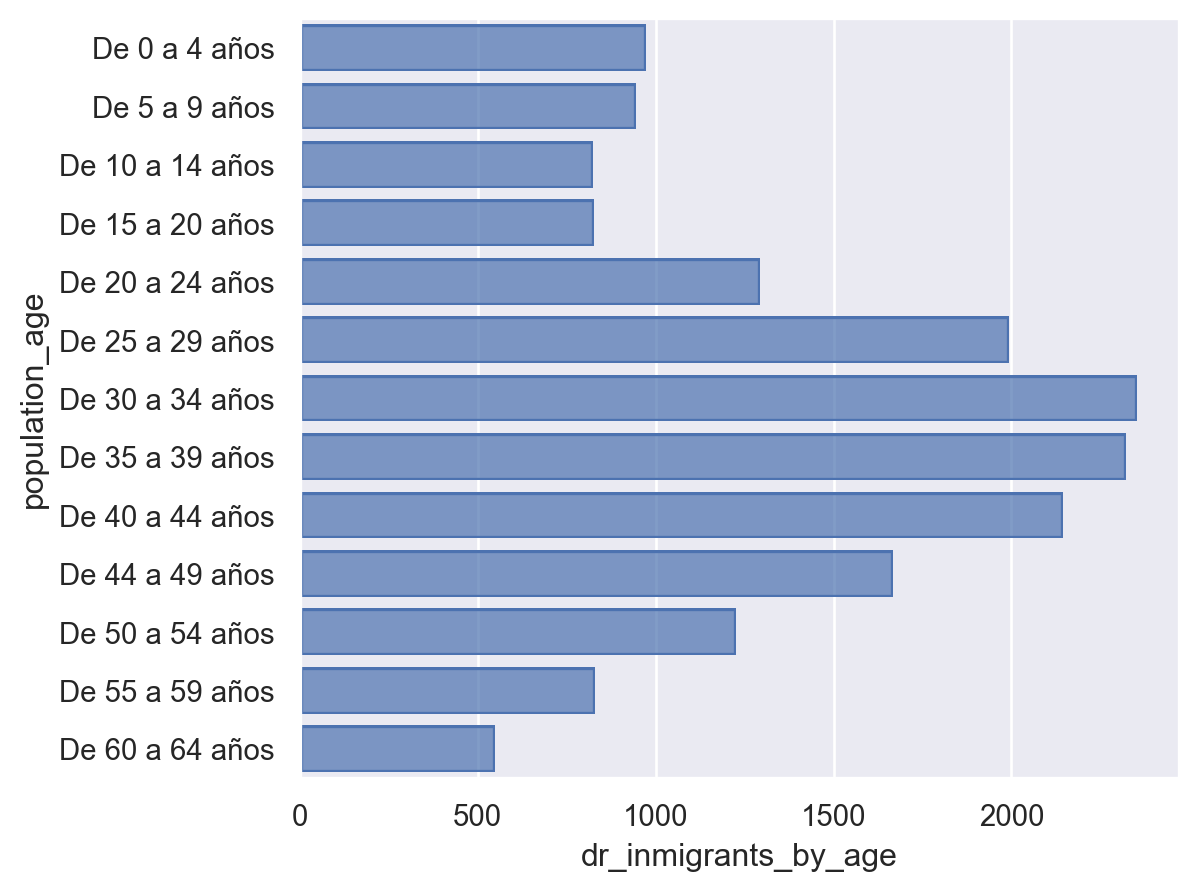

In [90]:
import seaborn.objects as so
(so.Plot(data= df, y="population_age", x="dr_inmigrants_by_age")
.add(so.Bar(), so.Agg(), so.Dodge()))


In [91]:
y=df['population_age'] 
X= df['dr_inmigrants_by_age']

correlations_matrix = df.corr()
correlations_matrix

C:\Users\sanch\AppData\Local\Temp\ipykernel_46112\4147574085.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = df.corr()


,male,female,total,%_population,dr_inmigrants_by_age,dr_percentage_population
male,1.000000,0.984277,0.996110,0.996096,0.996101,0.996101
female,0.984277,1.000000,0.996013,0.996026,0.996021,0.996021
total,0.996110,0.996013,1.000000,1.000000,0.999999,0.999999
%_population,0.996096,0.996026,1.000000,1.000000,1.000000,1.000000
dr_inmigrants_by_age,0.996101,0.996021,0.999999,1.000000,1.000000,1.000000
dr_percentage_population,0.996101,0.996021,0.999999,1.000000,1.000000,1.000000


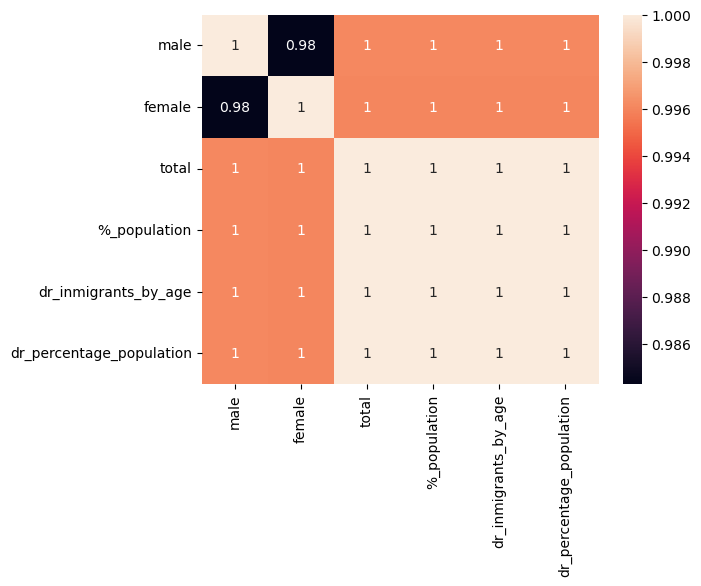

In [92]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [93]:
y = df['population_age']
X = df.drop(['dr_inmigrants_by_age'], axis=1)

In [94]:
X.shape

(13, 6)

In [95]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [96]:
X_num 

,male,female,total,%_population,dr_percentage_population
0,33587,32261,65848,5.18,0.076584
1,32761,31094,63855,5.02,0.074225
2,28939,26729,55668,4.38,0.064790
3,31214,24785,55999,4.40,0.065104
4,46960,40603,87563,6.88,0.101745
5,68087,66617,134704,10.59,0.156627
6,78804,80303,159107,12.51,0.185012
7,78989,77909,156898,12.34,0.182496
8,77358,67724,145082,11.41,0.168736
9,61764,51092,112856,8.87,0.131152


In [97]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
male,13.0,48550.538462,21748.990500,18444.000000,31214.00000,44868.000000,68087.000000,78989.000000
female,13.0,44813.923077,21481.422635,18723.000000,26856.00000,37885.000000,66617.000000,80303.000000
total,13.0,93364.461538,43060.158476,37167.000000,56238.00000,82753.000000,134704.000000,159107.000000
%_population,13.0,7.340769,3.386415,2.920000,4.42000,6.510000,10.590000,12.510000
dr_percentage_population,13.0,0.108561,0.050083,0.043167,0.06534,0.096319,0.156627,0.185012


In [98]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,male,female,total,%_population,dr_percentage_population
0,0.250111,0.219844,0.235206,0.235662,0.235588
1,0.236469,0.200893,0.218862,0.218978,0.218958
2,0.173342,0.130010,0.151722,0.152242,0.152439
3,0.210917,0.098441,0.154437,0.154327,0.154656
4,0.470989,0.355310,0.413285,0.412930,0.412971


<class 'pandas.core.frame.DataFrame'>


In [99]:
X_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
male,13.0,0.497259,0.359220,0.0,0.210917,0.436436,0.819936,1.0
female,13.0,0.423692,0.348838,0.0,0.132072,0.311172,0.777753,1.0
total,13.0,0.460862,0.353126,0.0,0.156397,0.373840,0.799877,1.0
%_population,13.0,0.460977,0.353119,0.0,0.156413,0.374348,0.799791,1.0
dr_percentage_population,13.0,0.461027,0.353082,0.0,0.156319,0.374723,0.799889,1.0


In [100]:
X_cat = df.select_dtypes(include = object)
X_cat.head()

,population_age
0,De 0 a 4 años
1,De 5 a 9 años
2,De 10 a 14 años
3,De 15 a 20 años
4,De 20 a 24 años


In [101]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,population_age_De 10 a 14 años,population_age_De 15 a 20 años,population_age_De 20 a 24 años,population_age_De 25 a 29 años,population_age_De 30 a 34 años,population_age_De 35 a 39 años,population_age_De 40 a 44 años,population_age_De 44 a 49 años,population_age_De 5 a 9 años,population_age_De 50 a 54 años,population_age_De 55 a 59 años,population_age_De 60 a 64 años
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X_concat = pd.concat([X_normalized,X_cat_encode], axis=1)
X_concat

,male,female,total,%_population,dr_percentage_population,population_age_De 10 a 14 años,population_age_De 15 a 20 años,population_age_De 20 a 24 años,population_age_De 25 a 29 años,population_age_De 30 a 34 años,population_age_De 35 a 39 años,population_age_De 40 a 44 años,population_age_De 44 a 49 años,population_age_De 5 a 9 años,population_age_De 50 a 54 años,population_age_De 55 a 59 años,population_age_De 60 a 64 años
0,0.250111,0.219844,0.235206,0.235662,0.235588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.236469,0.200893,0.218862,0.218978,0.218958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.173342,0.130010,0.151722,0.152242,0.152439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.210917,0.098441,0.154437,0.154327,0.154656,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.470989,0.355310,0.413285,0.412930,0.412971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.819936,0.777753,0.799877,0.799791,0.799889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.996944,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.961124,0.981885,0.982273,0.982262,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.973061,0.795729,0.884984,0.885297,0.885255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.715501,0.525641,0.620707,0.620438,0.620288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [103]:
X_concat.isna().sum()

male                              0
female                            0
total                             0
%_population                      0
dr_percentage_population          0
population_age_De 10 a 14 años    0
population_age_De 15 a 20 años    0
population_age_De 20 a 24 años    0
population_age_De 25 a 29 años    0
population_age_De 30 a 34 años    0
population_age_De 35 a 39 años    0
population_age_De 40 a 44 años    0
population_age_De 44 a 49 años    0
population_age_De 5 a 9 años      0
population_age_De 50 a 54 años    0
population_age_De 55 a 59 años    0
population_age_De 60 a 64 años    0
dtype: int64

In [104]:
X_concat.dropna(subset=['male'])


,male,female,total,%_population,dr_percentage_population,population_age_De 10 a 14 años,population_age_De 15 a 20 años,population_age_De 20 a 24 años,population_age_De 25 a 29 años,population_age_De 30 a 34 años,population_age_De 35 a 39 años,population_age_De 40 a 44 años,population_age_De 44 a 49 años,population_age_De 5 a 9 años,population_age_De 50 a 54 años,population_age_De 55 a 59 años,population_age_De 60 a 64 años
0,0.250111,0.219844,0.235206,0.235662,0.235588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.236469,0.200893,0.218862,0.218978,0.218958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.173342,0.130010,0.151722,0.152242,0.152439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.210917,0.098441,0.154437,0.154327,0.154656,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.470989,0.355310,0.413285,0.412930,0.412971,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.819936,0.777753,0.799877,0.799791,0.799889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.996944,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.961124,0.981885,0.982273,0.982262,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.973061,0.795729,0.884984,0.885297,0.885255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.715501,0.525641,0.620707,0.620438,0.620288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
X_concat.isna().sum()

male                              0
female                            0
total                             0
%_population                      0
dr_percentage_population          0
population_age_De 10 a 14 años    0
population_age_De 15 a 20 años    0
population_age_De 20 a 24 años    0
population_age_De 25 a 29 años    0
population_age_De 30 a 34 años    0
population_age_De 35 a 39 años    0
population_age_De 40 a 44 años    0
population_age_De 44 a 49 años    0
population_age_De 5 a 9 años      0
population_age_De 50 a 54 años    0
population_age_De 55 a 59 años    0
population_age_De 60 a 64 años    0
dtype: int64

 Processing DATA

 X-y Split

In [106]:
from sklearn.model_selection import train_test_split
y = df['population_age']
X = df.drop(['dr_inmigrants_by_age'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 6)
(3, 6)
(10,)
(3,)


In [107]:
X_train.head()

,population_age,male,female,total,%_population,dr_percentage_population
7,De 35 a 39 años,78989,77909,156898,12.34,0.182496
8,De 40 a 44 años,77358,67724,145082,11.41,0.168736
1,De 5 a 9 años,32761,31094,63855,5.02,0.074225
4,De 20 a 24 años,46960,40603,87563,6.88,0.101745
12,De 60 a 64 años,18444,18723,37167,2.92,0.043167


In [108]:
y_train.head()

7     De 35 a 39 años
8     De 40 a 44 años
1       De 5 a 9 años
4     De 20 a 24 años
12    De 60 a 64 años
Name: population_age, dtype: object

In [109]:
X_test.head()

,population_age,male,female,total,%_population,dr_percentage_population
5,De 25 a 29 años,68087,66617,134704,10.59,0.156627
9,De 44 a 49 años,61764,51092,112856,8.87,0.131152
3,De 15 a 20 años,31214,24785,55999,4.40,0.065104


# X_train_num scaling

In [110]:
X_train_num = X_train.select_dtypes(include = np.number)

X_train_num 

,male,female,total,%_population,dr_percentage_population
7,78989,77909,156898,12.34,0.182496
8,77358,67724,145082,11.41,0.168736
1,32761,31094,63855,5.02,0.074225
4,46960,40603,87563,6.88,0.101745
12,18444,18723,37167,2.92,0.043167
6,78804,80303,159107,12.51,0.185012
11,29382,26856,56238,4.42,0.065340
10,44868,37885,82753,6.51,0.096319
0,33587,32261,65848,5.18,0.076584
2,28939,26729,55668,4.38,0.064790


In [111]:
X_train_num = X_train_num.astype(float)

In [112]:
X_train_num.isna().sum()

male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
dtype: int64

In [113]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_normalized = MinMaxtransformer.transform(X_train_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_train_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,male,female,total,%_population,dr_percentage_population
0,1.000000,0.961124,0.981885,0.982273,0.982262
1,0.973061,0.795729,0.884984,0.885297,0.885255
2,0.236469,0.200893,0.218862,0.218978,0.218958
3,0.470989,0.355310,0.413285,0.412930,0.412971
4,0.000000,0.000000,0.000000,0.000000,0.000000


<class 'pandas.core.frame.DataFrame'>


In [114]:
X_normalized.isna().sum()

male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
dtype: int64

In [115]:
X_train_cat= X_train.select_dtypes(include = object)

In [116]:
encoder = OneHotEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_train_cat_encoded

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [117]:
import numpy as np
from scipy.sparse import hstack


X_train_combined = hstack([X_train_cat_encoded, X_train_num], format='csr')


In [118]:
data = {'population_age': ['De 0 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años', 'De 44 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años']}
X_train_cat = pd.DataFrame(data)

dt = ['De 0 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años', 'De 44 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años']

for pattern in dt:
    X_train_cat[pattern] = 0.0

for pattern in dt:
    X_train_cat[pattern] = X_train_cat['population_age'].str.contains(pattern).astype(float)


X_train_cat.drop(columns=['population_age'], inplace=True)


X_train_cat


,De 0 a 4 años,De 5 a 9 años,De 10 a 14 años,De 44 a 49 años,De 50 a 54 años,De 55 a 59 años,De 60 a 64 años
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
X_train_cat.isna().sum()

De 0 a 4 años      0
De 5 a 9 años      0
De 10 a 14 años    0
De 44 a 49 años    0
De 50 a 54 años    0
De 55 a 59 años    0
De 60 a 64 años    0
dtype: int64

In [120]:
X_train_concat= pd.concat([X_train_cat,X_normalized], axis=1)
X_train_concat

,De 0 a 4 años,De 5 a 9 años,De 10 a 14 años,De 44 a 49 años,De 50 a 54 años,De 55 a 59 años,De 60 a 64 años,male,female,total,%_population,dr_percentage_population
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.961124,0.981885,0.982273,0.982262
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.973061,0.795729,0.884984,0.885297,0.885255
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.236469,0.200893,0.218862,0.218978,0.218958
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.470989,0.355310,0.413285,0.412930,0.412971
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.996944,1.000000,1.000000,1.000000,1.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.180659,0.132072,0.156397,0.156413,0.156319
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436436,0.311172,0.373840,0.374348,0.374723
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250111,0.219844,0.235206,0.235662,0.235588
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173342,0.130010,0.151722,0.152242,0.152439


In [123]:
X_train = X_train.replace(np.nan, 0)

In [124]:
X_train[X_train['male'] != 0]

,population_age,male,female,total,%_population,dr_percentage_population
7,De 35 a 39 años,78989,77909,156898,12.34,0.182496
8,De 40 a 44 años,77358,67724,145082,11.41,0.168736
1,De 5 a 9 años,32761,31094,63855,5.02,0.074225
4,De 20 a 24 años,46960,40603,87563,6.88,0.101745
12,De 60 a 64 años,18444,18723,37167,2.92,0.043167
6,De 30 a 34 años,78804,80303,159107,12.51,0.185012
11,De 55 a 59 años,29382,26856,56238,4.42,0.065340
10,De 50 a 54 años,44868,37885,82753,6.51,0.096319
0,De 0 a 4 años,33587,32261,65848,5.18,0.076584
2,De 10 a 14 años,28939,26729,55668,4.38,0.064790


In [125]:
X_train_concat.isna().sum()

De 0 a 4 años               3
De 5 a 9 años               3
De 10 a 14 años             3
De 44 a 49 años             3
De 50 a 54 años             3
De 55 a 59 años             3
De 60 a 64 años             3
male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
dtype: int64

In [126]:
X_test_num = X_test.select_dtypes(np.number)
X_test_num

,male,female,total,%_population,dr_percentage_population
5,68087,66617,134704,10.59,0.156627
9,61764,51092,112856,8.87,0.131152
3,31214,24785,55999,4.40,0.065104


In [127]:
X_test_num.isna().sum()

male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
dtype: int64

In [128]:
X_test_cat = X_test.select_dtypes(np.object)
X_test_cat

C:\Users\sanch\AppData\Local\Temp\ipykernel_46112\30665540.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(np.object)


,population_age
5,De 25 a 29 años
9,De 44 a 49 años
3,De 15 a 20 años


In [129]:
X_test_cat_encoded = pd.get_dummies(X_test_cat['population_age'], prefix_sep=' ')
X_test_cat_encoded

,De 15 a 20 años,De 25 a 29 años,De 44 a 49 años
5,0,1,0
9,0,0,1
3,1,0,0


In [130]:
X_test_cat_encoded.isna().sum()

De 15 a 20 años    0
De 25 a 29 años    0
De 44 a 49 años    0
dtype: int64

In [131]:
X_test_cat.shape

(3, 1)

In [132]:
X_train_cat.shape

(7, 7)

In [133]:
from sklearn.preprocessing import MinMaxScaler
transformer= MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index=X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()


(10, 5)


,male,female,total,%_population,dr_percentage_population
7,1.000000,0.961124,0.981885,0.982273,0.982262
8,0.973061,0.795729,0.884984,0.885297,0.885255
1,0.236469,0.200893,0.218862,0.218978,0.218958
4,0.470989,0.355310,0.413285,0.412930,0.412971
12,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
X_train_num_scale.isna().sum()

male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
dtype: int64

In [135]:
from sklearn.preprocessing import MinMaxScaler
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index=X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

(3, 5)


,male,female,total,%_population,dr_percentage_population
5,0.819936,0.777753,0.799877,0.799791,0.799889
9,0.715501,0.525641,0.620707,0.620438,0.620288
3,0.210917,0.098441,0.154437,0.154327,0.154656


In [136]:
X_test_num_scale.isna().sum()

male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
dtype: int64

In [137]:
X_train = pd.concat([X_train_num_scale, X_train_cat], axis = 1)


In [138]:
X_train

,male,female,total,%_population,dr_percentage_population,De 0 a 4 años,De 5 a 9 años,De 10 a 14 años,De 44 a 49 años,De 50 a 54 años,De 55 a 59 años,De 60 a 64 años
7,1.000000,0.961124,0.981885,0.982273,0.982262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.973061,0.795729,0.884984,0.885297,0.885255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236469,0.200893,0.218862,0.218978,0.218958,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.470989,0.355310,0.413285,0.412930,0.412971,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.996944,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.180659,0.132072,0.156397,0.156413,0.156319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.436436,0.311172,0.373840,0.374348,0.374723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.250111,0.219844,0.235206,0.235662,0.235588,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.173342,0.130010,0.151722,0.152242,0.152439,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
X_train = X_train.replace(np.nan, 0)

In [140]:
X_train[X_train['male'] != 0]


,male,female,total,%_population,dr_percentage_population,De 0 a 4 años,De 5 a 9 años,De 10 a 14 años,De 44 a 49 años,De 50 a 54 años,De 55 a 59 años,De 60 a 64 años
7,1.000000,0.961124,0.981885,0.982273,0.982262,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.973061,0.795729,0.884984,0.885297,0.885255,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.236469,0.200893,0.218862,0.218978,0.218958,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.470989,0.355310,0.413285,0.412930,0.412971,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.996944,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.180659,0.132072,0.156397,0.156413,0.156319,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.436436,0.311172,0.373840,0.374348,0.374723,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.250111,0.219844,0.235206,0.235662,0.235588,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.173342,0.130010,0.151722,0.152242,0.152439,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [141]:
X_test = pd.concat([X_test_num_scale, X_test_cat_encoded], axis = 1)
X_test

,male,female,total,%_population,dr_percentage_population,De 15 a 20 años,De 25 a 29 años,De 44 a 49 años
5,0.819936,0.777753,0.799877,0.799791,0.799889,0,1,0
9,0.715501,0.525641,0.620707,0.620438,0.620288,0,0,1
3,0.210917,0.098441,0.154437,0.154327,0.154656,1,0,0


In [142]:
X_test.isna().sum()

male                        0
female                      0
total                       0
%_population                0
dr_percentage_population    0
De 15 a 20 años             0
De 25 a 29 años             0
De 44 a 49 años             0
dtype: int64

# LR Model


In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train, y_train)
# predictions=model.predict(X_test)

In [ ]:
# print(classification_report(y_test, predictions))
# print('predicted labels:',predictions)
# print('F1-score: ', f1_score(y_test, predictions))

This project focus is to answer the following question:
    How many dominicans inmigrants between 16 and 25 years old leave the school?
    To answer this question I have decided as  my variables:
        Polulation range (Y)and categorical variable
        DR_inmigrants by age (x) Numerical Variable

The methology that I've applied to define my target has been taken the min and max values from my stats calculation.
The analysis results are:
    
    Our target is between 15 and 20 years old but also an inmportant and relevant target to develop our Hypothesis is on the age_range
    20-24 / 25-29 years old.( see graphs)
    
    There isn't correlation bettween the variables.
    
    At catalunya lives a total of 1.272.000 of inmigrants of almost all the countries of the world.
    DR inmigrants represents a total 18.810 people.
    The total population in Catalalunya is 7.699,7 people.
    Dominicans reresents a 1.48% over the total inmigrants population.
    

Due to that I'm still waiting for a dataset that I've requested to the servei indicadors estadistiques https://educacio.gencat.cat/ca/departament/estadistiques/indicadors/
I couldn't finished this part of the project applyind a statistics mdel but reading and listenning about the subject on the route below:
Logistic Regression for classification of data [Part 16] | Machine Learning for Beginners
I could apply binomial logistic regression which one is perfect for dataset with few rows.

After I get the dataset I will be possible to answer the following questions:
    How many of them don't work and study? (age range probably between 20-29)
    Are there 2nd inmigrants generation or ther aren't?
    Where are the highest percentage of students who leave the school by gender?
    
    
To apply any model to the information that I get until now could give us a result with a high percentage of error, but we also can do it and continue workking on the project. 
    
    
    

Predictions